
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [ ]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


In [ ]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [31]:
def adam(batch_size, epochs ,opt):
    if opt is None:
        opt='adam'
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
    model = Sequential()

    #   第二步：構建網絡層

    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 

    # 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
    Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
    Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)
    
        # 第五步：訓練, 修正 model 參數
    #Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
    import tensorflow as tf
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
    
    
    
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
    
    
    import matplotlib.pyplot as plt

    %matplotlib inline

    # history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 16s - loss: 2.9153 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 2/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 3/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 4/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 5/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 6/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 7/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 8/20
 - 17s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 9/20
 - 15s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 10/20
 - 14s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 11/20
 - 14s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 12/20
 - 14s - los

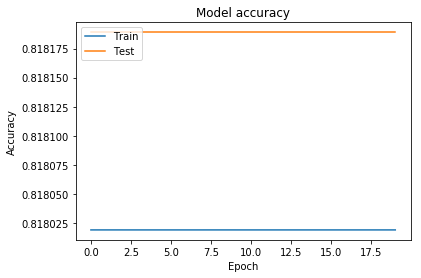

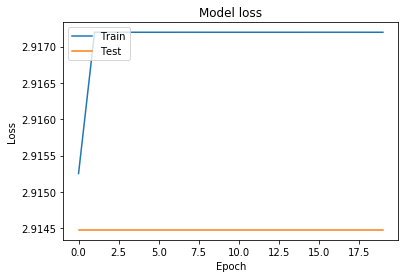

In [32]:
adam(128,20,'adam')

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 10s - loss: 2.6734 - acc: 0.8322 - val_loss: 2.6115 - val_acc: 0.8370
Epoch 2/20
 - 9s - loss: 2.6565 - acc: 0.8342 - val_loss: 2.6796 - val_acc: 0.8328
Epoch 3/20
 - 10s - loss: 2.8378 - acc: 0.8230 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/20
 - 10s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/20
 - 9s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 11/20
 - 10s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 12/20
 - 10s - loss: 2.87

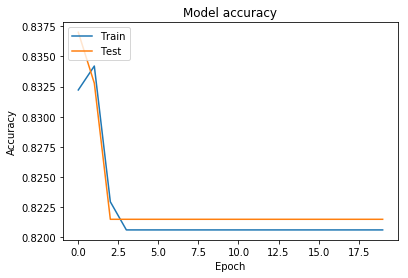

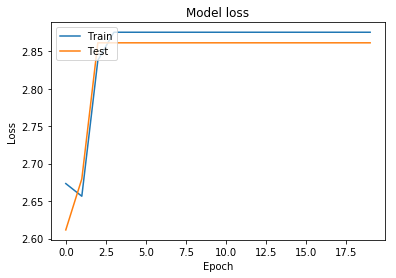

In [33]:
adam(256,20,'adam')

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 8s - loss: 2.3923 - acc: 0.8480 - val_loss: 2.2229 - val_acc: 0.8603
Epoch 2/20
 - 7s - loss: 2.4132 - acc: 0.8491 - val_loss: 2.5815 - val_acc: 0.8387
Epoch 3/20
 - 7s - loss: 2.5440 - acc: 0.8412 - val_loss: 2.5757 - val_acc: 0.8393
Epoch 4/20
 - 7s - loss: 2.3735 - acc: 0.8515 - val_loss: 2.2996 - val_acc: 0.8560
Epoch 5/20
 - 7s - loss: 2.5277 - acc: 0.8422 - val_loss: 2.5888 - val_acc: 0.8384
Epoch 6/20
 - 7s - loss: 2.5406 - acc: 0.8414 - val_loss: 2.7535 - val_acc: 0.8281
Epoch 7/20
 - 7s - loss: 2.7275 - acc: 0.8298 - val_loss: 2.6827 - val_acc: 0.8326
Epoch 8/20
 - 7s - loss: 2.7639 - acc: 0.8276 - val_loss: 2.7853 - val_acc: 0.8262
Epoch 9/20
 - 7s - loss: 2.7874 - acc: 0.8261 - val_loss: 2.7651 - val_acc: 0.8275
Epoch 10/20
 - 7s - loss: 2.8238 - acc: 0.8238 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 11/20
 - 7s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 12/20
 - 7s - loss: 2.8870 - 

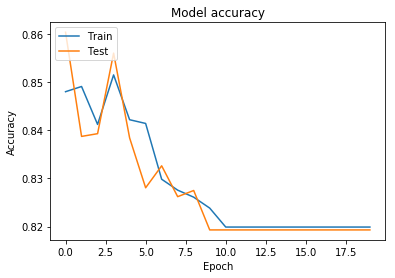

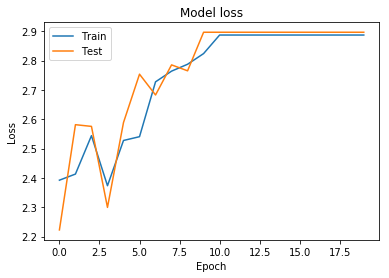

In [34]:
adam(512,20,'adam')

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 7s - loss: 2.7948 - acc: 0.8238 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 11/20
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 12/20
 - 6s - loss: 2.8397 - 

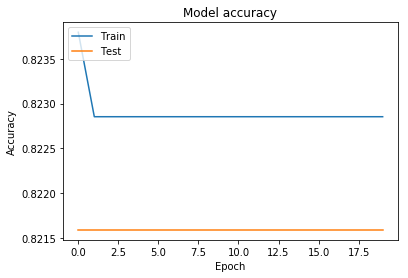

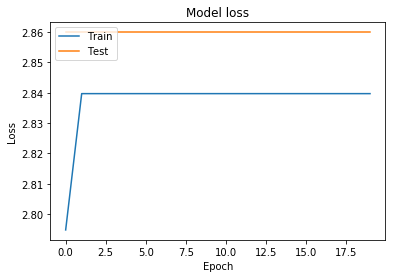

In [35]:
adam(1024,20,'adam')

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 7s - loss: 2.0180 - acc: 0.8519 - val_loss: 0.7827 - val_acc: 0.9107
Epoch 2/20
 - 6s - loss: 0.2817 - acc: 0.9587 - val_loss: 0.2534 - val_acc: 0.9601
Epoch 3/20
 - 6s - loss: 0.1032 - acc: 0.9785 - val_loss: 0.6220 - val_acc: 0.9244
Epoch 4/20
 - 6s - loss: 0.0834 - acc: 0.9822 - val_loss: 0.1566 - val_acc: 0.9710
Epoch 5/20
 - 6s - loss: 0.0519 - acc: 0.9873 - val_loss: 0.1193 - val_acc: 0.9748
Epoch 6/20
 - 6s - loss: 0.0396 - acc: 0.9899 - val_loss: 0.1348 - val_acc: 0.9733
Epoch 7/20
 - 6s - loss: 0.0327 - acc: 0.9915 - val_loss: 0.0791 - val_acc: 0.9821
Epoch 8/20
 - 6s - loss: 0.0258 - acc: 0.9934 - val_loss: 0.0710 - val_acc: 0.9837
Epoch 9/20
 - 6s - loss: 0.0214 - acc: 0.9948 - val_loss: 0.0727 - val_acc: 0.9833
Epoch 10/20
 - 6s - loss: 0.0182 - acc: 0.9957 - val_loss: 0.1087 - val_acc: 0.9776
Epoch 11/20
 - 6s - loss: 0.0175 - acc: 0.9957 - val_loss: 0.0914 - val_acc: 0.9794
Epoch 12/20
 - 6s - loss: 0.0154 - 

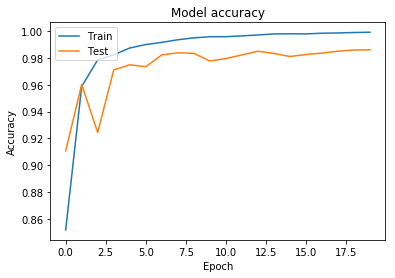

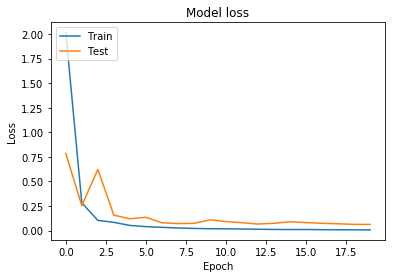

In [37]:
adam(512,20,'SGD')

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 8s - loss: 2.8692 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/20
 - 7s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/20
 - 7s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/20
 - 7s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 11/20
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 12/20
 - 6s - loss: 2.8755 - 

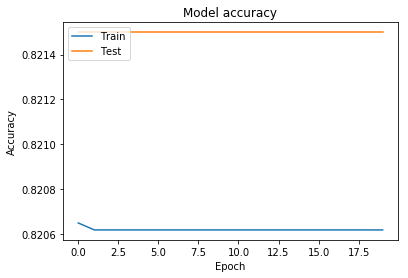

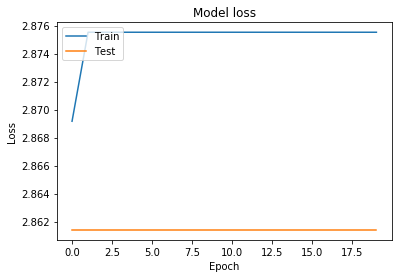

In [38]:
adam(512,20,'Rmsprop')